<a href="https://colab.research.google.com/github/deondmello16/JAX_IITM/blob/main/DeepFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install mtcnn
from mtcnn import MTCNN
import threading as thr
 
#!cd /kaggle/working/
!mkdir frames_1
!mkdir frames_2
!mkdir frames_3
!mkdir frames_4
!mkdir results_1
!mkdir results_2
!mkdir presidents

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘frames_1’: File exists
mkdir: cannot create directory ‘frames_2’: File exists
mkdir: cannot create directory ‘frames_3’: File exists
mkdir: cannot create directory ‘frames_4’: File exists
mkdir: cannot create directory ‘results_1’: File exists
mkdir: cannot create directory ‘results_2’: File exists
mkdir: cannot create directory ‘presidents’: File exists


In [2]:
input_1 = 'presidents/trump1.mp4'
input_2 = 'presidents/trump2.mp4'
input_3 = 'presidents/biden1.mp4'
input_4 = 'presidents/biden2.mp4'
output_1 = 'frames_1/'
output_2 = 'frames_2/'
output_3 = 'frames_3/'
output_4 = 'frames_4/'

In [3]:
def extract_frames(input_path,output_path):
    videocapture = cv2.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv2.imwrite(output_path+"frame%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    return count

In [4]:
total_frames_1 = extract_frames(input_1,output_1)
total_frames_2 = extract_frames(input_2,output_2)
total_frames_3 = extract_frames(input_3,output_3)
total_frames_4 = extract_frames(input_4,output_4)

In [5]:
print('Total frames extracted in video 1: ',total_frames_1)
print('Total frames extracted in video 2: ',total_frames_2)
print('Total frames extracted in video 3: ',total_frames_3)
print('Total frames extracted in video 4: ',total_frames_4)

Total frames extracted in video 1:  1701
Total frames extracted in video 2:  1875
Total frames extracted in video 3:  1109
Total frames extracted in video 4:  1530


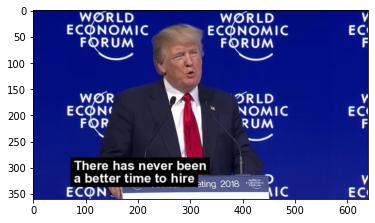

In [6]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames_1/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32')
image /= 255.0
plt.imshow(image)
plt.show()

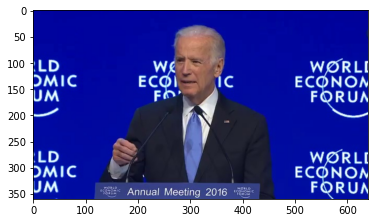

In [7]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames_3/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
def extract_faces(source_1,source_2,destination,detector):
    global counter
    counter = 0
    def src1(source_1,destination,detector):
      counter = 0
      for dirname, _, filenames in os.walk(source_1):
          for filename in filenames:
              try:
                  image = cv2.imread(os.path.join(dirname, filename))
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  detections = detector.detect_faces(image)
                  x, y, width, height = detections[0]['box']
                  x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                  face = image[y1:y2, x1:x2]
                  face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                  plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                  # print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
              except:
                  pass
              counter += 2
    def src2(source_2,destination,detector):
      counter = 0
      for dirname, _, filenames in os.walk(source_2):
          for filename in filenames:
              try:
                  image = cv2.imread(os.path.join(dirname, filename))
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  detections = detector.detect_faces(image)
                  x, y, width, height = detections[0]['box']
                  x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                  face = image[y1:y2, x1:x2]
                  face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                  plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                  # print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
              except:
                  pass
              counter += 1
    t1 = thr.Thread(target=src1,args=(source_1,destination,detector))
    t2 = thr.Thread(target=src2,args=(source_2,destination,detector))

    t1.start()
    t2.start()

    t1.join()
    t2.join()

detector = MTCNN()
t1 = thr.Thread(target=extract_faces,args=('frames_1/','frames_2/', 'results_1/',detector))
t2 = thr.Thread(target=extract_faces,args=('frames_3/','frames_4/', 'results_2/',detector))

t1.start()
t2.start()

t1.join()
t2.join()

# extract_faces('frames_1/','frames_2/', 'results_1/',detector)
# extract_faces('frames_3/','frames_4/', 'results_2/',detector)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 118ms/step


In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
for i in range(1000):
    winsound.Beep(frequency, duration)
